# Heart Disease Dataset Classification

## Proje [linki](https://www.kaggle.com/datasets/zeeshanmulla/heart-disease-dataset)

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/Heart Disease Dataset.csv


In [32]:
df = pd.read_csv(os.path.join(dirname, filename))
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


sex


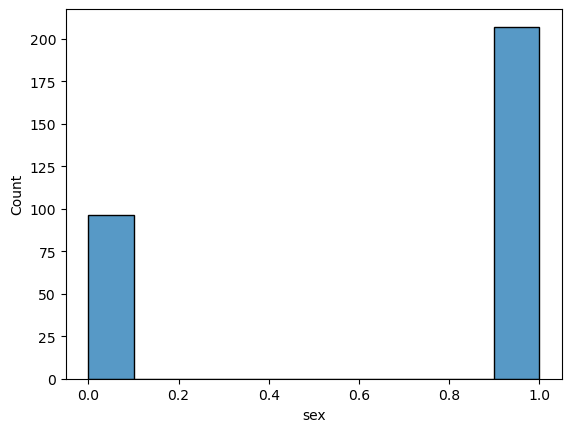

1    207
0     96
Name: sex, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cp


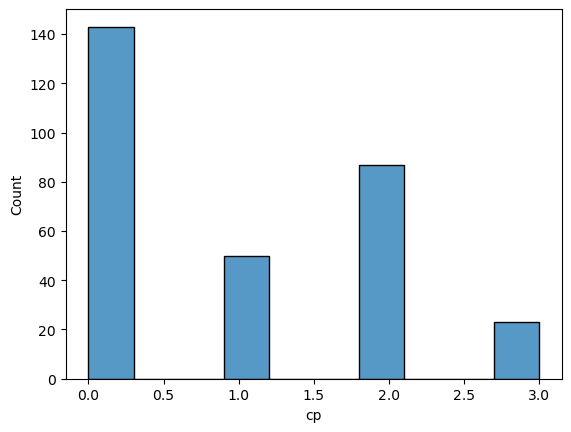

0    143
2     87
1     50
3     23
Name: cp, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
trestbps


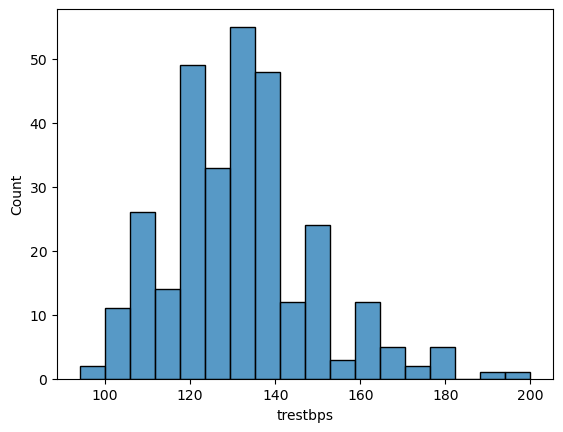

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
chol


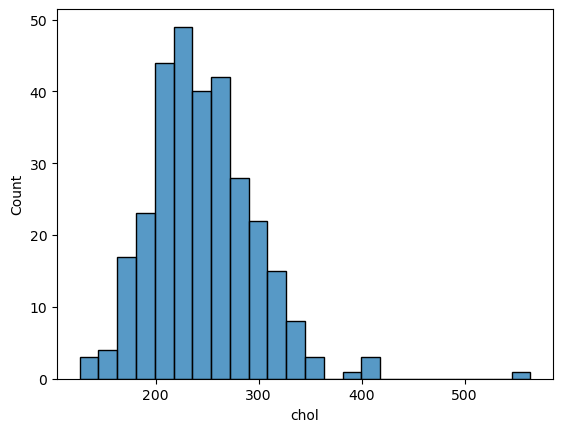

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
fbs


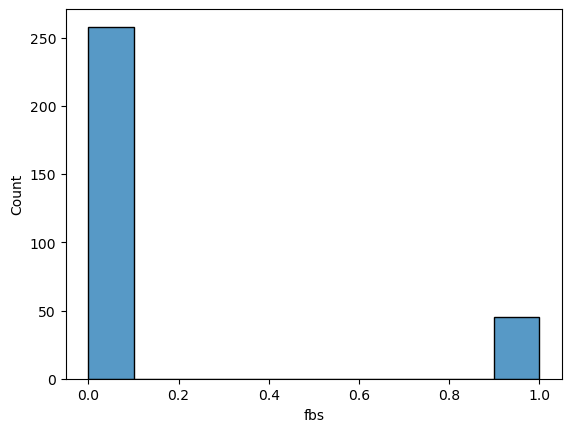

0    258
1     45
Name: fbs, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
restecg


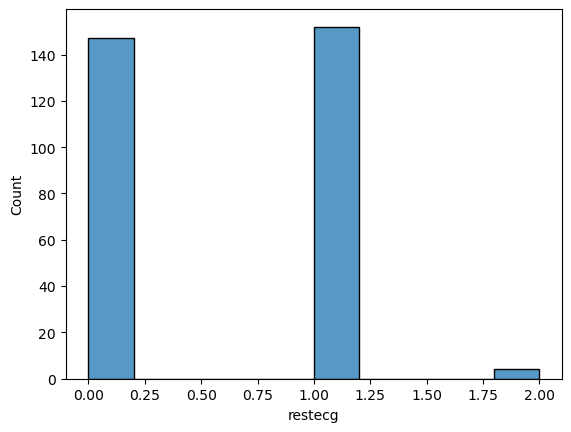

1    152
0    147
2      4
Name: restecg, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
thalach


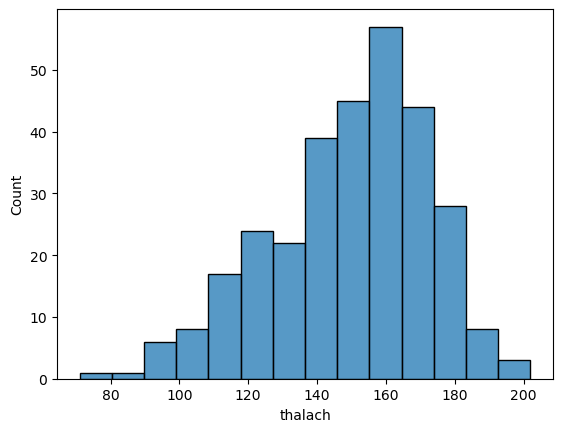

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
exang


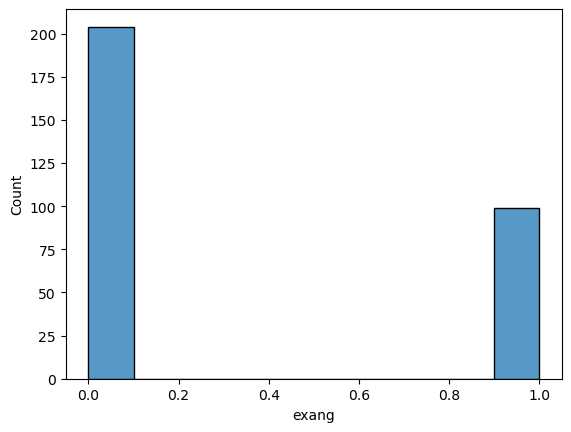

0    204
1     99
Name: exang, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
oldpeak


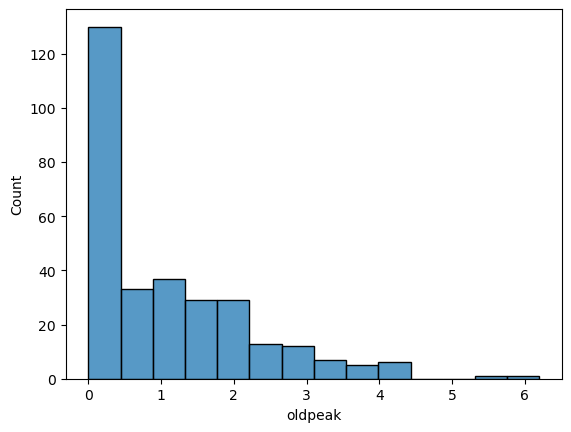

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
slope


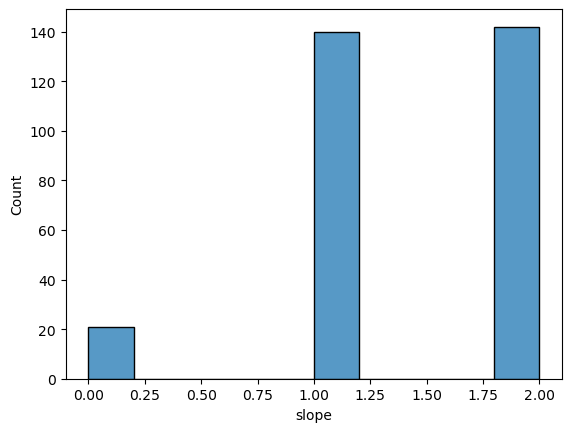

2    142
1    140
0     21
Name: slope, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
ca


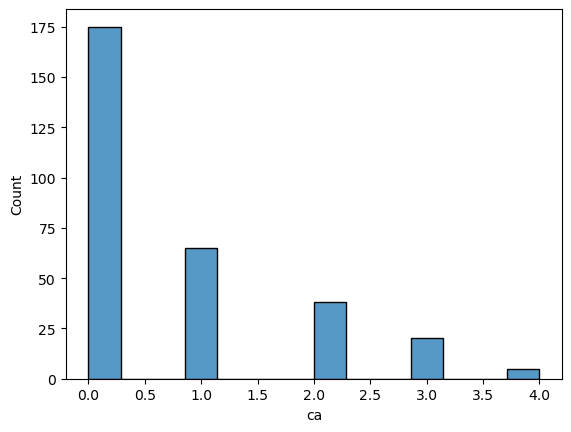

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
thal


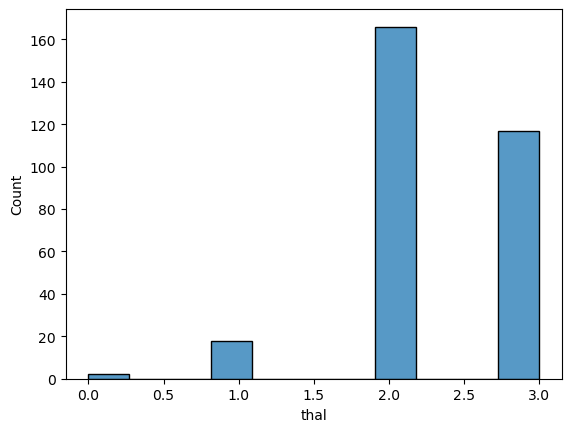

2    166
3    117
1     18
0      2
Name: thal, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(1,len(df.columns)-1):
    print(df.columns[i])
    aziz = df[df.columns[i]].value_counts()
    sns.histplot(df[df.columns[i]])
    plt.show()
    print(aziz)
    print("-"*85)
    print("-"*85)

In [38]:
df.chol.mean()

246.26402640264027

In [39]:
df.chol.quantile(.97)

340.94

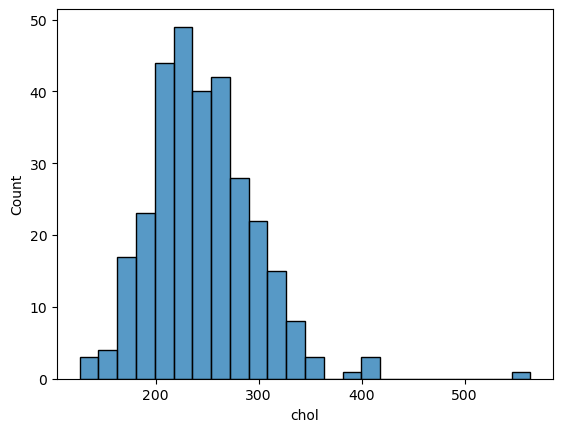

In [40]:
sns.histplot(df["chol"])
plt.show()

In [41]:
df.chol[df["chol"] >=  df.chol.quantile(.97)]

4      354
28     417
39     360
85     564
96     394
161    342
180    353
215    341
220    407
246    409
Name: chol, dtype: int64

In [42]:
df.chol[df["chol"] >=  df.chol.quantile(.97)] = df.chol.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df.chol[df["chol"] >=  df.chol.quantile(.97)]

16     340.0
45     325.0
110    325.0
177    335.0
182    330.0
195    326.0
217    330.0
234    322.0
266    327.0
288    335.0
Name: chol, dtype: float64

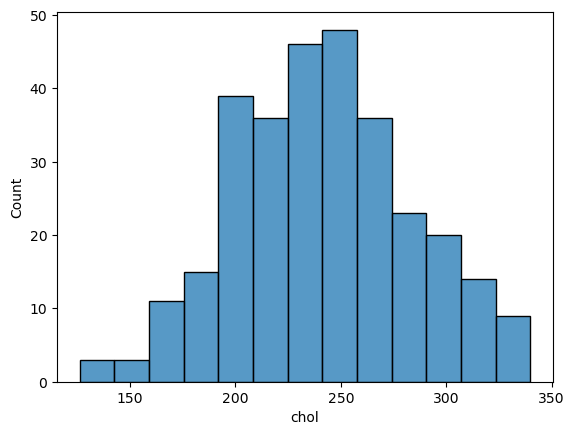

In [44]:
sns.histplot(df["chol"])
plt.show()

In [46]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

In [47]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.000000,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.000000,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.000000,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.000000,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,246.264026,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.000000,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264.000000,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193.000000,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131.000000,0,1,115,1,1.2,1,1,3,0


In [49]:
x=df.drop("target", axis=1)
y=df["target"]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [51]:
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [52]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500, batch_size=328, verbose=1)

Epoch 1/1500
1/1 [==============================] - 3s 3s/step - loss: 0.8212 - accuracy: 0.5041 - val_loss: 6.1908 - val_accuracy: 0.5246
Epoch 2/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.8475 - accuracy: 0.5000 - val_loss: 6.1197 - val_accuracy: 0.5246
Epoch 3/1500
1/1 [==============================] - 0s 37ms/step - loss: 0.8604 - accuracy: 0.5248 - val_loss: 5.6576 - val_accuracy: 0.5246
Epoch 4/1500
1/1 [==============================] - 0s 37ms/step - loss: 0.8995 - accuracy: 0.4752 - val_loss: 5.0462 - val_accuracy: 0.5246
Epoch 5/1500
1/1 [==============================] - 0s 52ms/step - loss: 0.9242 - accuracy: 0.5000 - val_loss: 4.4088 - val_accuracy: 0.5246
Epoch 6/1500
1/1 [==============================] - 0s 35ms/step - loss: 0.8415 - accuracy: 0.5041 - val_loss: 4.1112 - val_accuracy: 0.5246
Epoch 7/1500
1/1 [==============================] - 0s 34ms/step - loss: 0.8131 - accuracy: 0.5496 - val_loss: 4.0599 - val_accuracy: 0.5246
Epoch 8/1500
1/

In [53]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.0509 - accuracy: 0.7213


[1.0508753061294556, 0.7213114500045776]

In [54]:
tahmin = model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [55]:
rounded = [round(x[0]) for x in tahmin]
rounded[:5]

[1, 1, 1, 0, 1]

In [56]:
r2_score(rounded,y_test)

-0.12962962962962976

In [57]:
(mean_squared_error(y_test,rounded))**.5

0.5279095799378564

<AxesSubplot:>

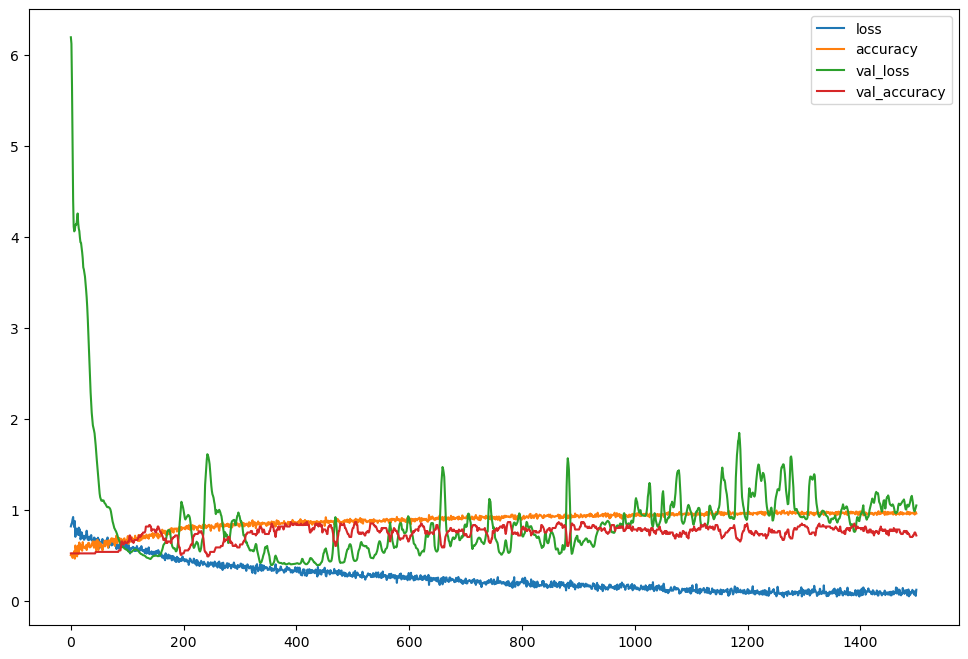

In [58]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [60]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [61]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2500, batch_size=256, verbose=1)

Epoch 1/2500
1/1 [==============================] - 2s 2s/step - loss: 0.8984 - accuracy: 0.4711 - val_loss: 0.7223 - val_accuracy: 0.5246
Epoch 2/2500
1/1 [==============================] - 0s 33ms/step - loss: 0.8703 - accuracy: 0.4793 - val_loss: 0.7260 - val_accuracy: 0.5246
Epoch 3/2500
1/1 [==============================] - 0s 30ms/step - loss: 0.7592 - accuracy: 0.5207 - val_loss: 0.7588 - val_accuracy: 0.5246
Epoch 4/2500
1/1 [==============================] - 0s 53ms/step - loss: 0.8087 - accuracy: 0.5331 - val_loss: 0.8259 - val_accuracy: 0.5246
Epoch 5/2500
1/1 [==============================] - 0s 30ms/step - loss: 0.8265 - accuracy: 0.4669 - val_loss: 0.8866 - val_accuracy: 0.5246
Epoch 6/2500
1/1 [==============================] - 0s 30ms/step - loss: 0.7121 - accuracy: 0.6033 - val_loss: 0.9286 - val_accuracy: 0.5246
Epoch 7/2500
1/1 [==============================] - 0s 29ms/step - loss: 0.7384 - accuracy: 0.5744 - val_loss: 0.9131 - val_accuracy: 0.5246
Epoch 8/2500
1/

In [62]:
model.evaluate(x_train,y_train)

8/8 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.9091


[0.5358852744102478, 0.9090909361839294]

In [63]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 1.3007 - accuracy: 0.7869


[1.3007160425186157, 0.7868852615356445]

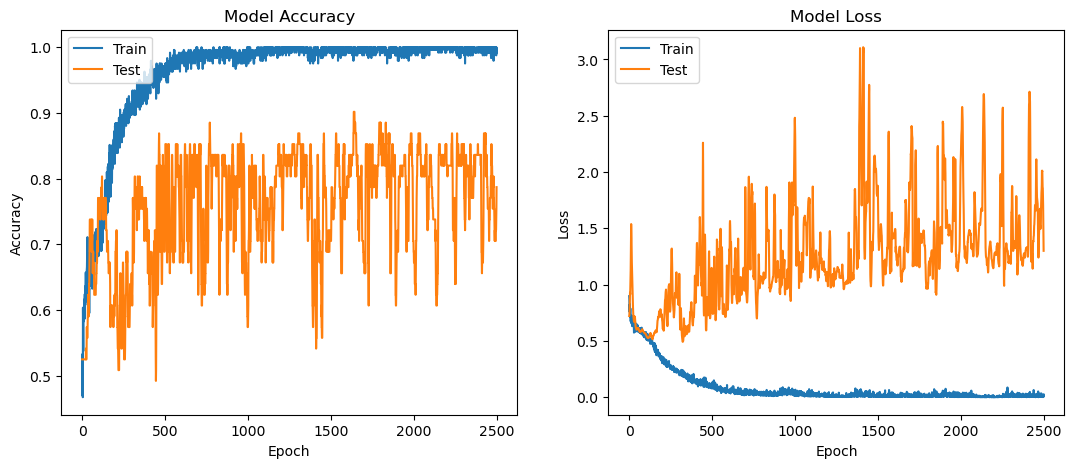

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,3,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();